<a href="https://colab.research.google.com/github/ksh-dong/Python25Study/blob/main/02_01_%ED%9B%88%EB%A0%A8%EC%84%B8%ED%8A%B8_%ED%85%8C%EC%8A%A4%ED%8A%B8%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

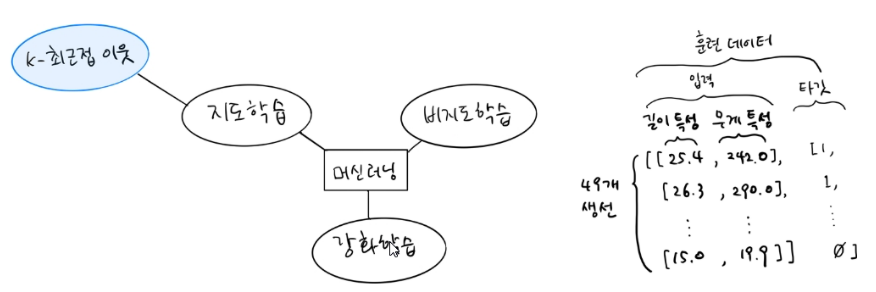

In [51]:
# ai 는 100점을 원하면 않됨 -> 과대 적합 -> 85~90%???
# 머신러닝에서 알고리즘 성능을 제대로 평가하려면 훈련 데이터 평가 데이터 나누어 학습
# 미리 준비된 데이터 중에서 일부를 떼어 훈련용과 테스트를 나누겠다.

# 도미 생선의 길이 : bream_length 도미용 길이 리스트
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미 생선의 무게 : bream_weigh 도미용 무게 리스트
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어 생선의 길이 : bream_length 도미용 길이 리스트
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어 생선의 무게 : bream_weigh 도미용 무게 리스트
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


# 도미(35개)와 빙어(14개) 데이터 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]   # 2차원 배열로 만듬
fish_target = [1]*35 + [0]*14        # 앞에서 35개는 1, 뒤에 14개는 0

In [52]:
# 도미 35, 빙어 14 총 49개의 샘플
# 사용하는 특성은 길이와 무게 2개
# 이것을 처움 35개를 훈련셋트로, 나머지 14개를 테스트 셋트로 사용하겠음

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

print(fish_data[4])

[29.0, 430.0]


In [53]:
print(fish_data[:5])  # 처음부터 5-1 인덱스 까지

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [54]:
print(fish_data[44:]) # 44~ 끝까지

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [55]:
# 2차원 배열로 만들어진 전처리 데이터를 나누어 훈련용(.fit), 평가용(.score)로 사용해보자
# 생선 데이터에서 처음 35개와 나머지 14개를 선택해서 리스트로 생성함

train_input = fish_data[:35]
train_target = fish_target[:35] # 훈련세트로 0~34
test_input = fish_data[35:]
test_target = fish_target[35:]  # 테스트 세트 35~ 마지막까지

In [56]:
kn.fit(train_input, train_target) # 훈련세트로 fit진행
kn.score(test_input, test_target) # 테스트 시작
# 결론 train_input에는 도미데이터만 다량으로 존재, test_input에는 빙어 데이터만 다량으로 존재
# 확률이 0.0인 이유는 샘플링 편향 : 샘플링이 한쪽으로 치우침
# fit 데이터는 도미만, 평가데이터는 빙어만 되어있음!


0.0

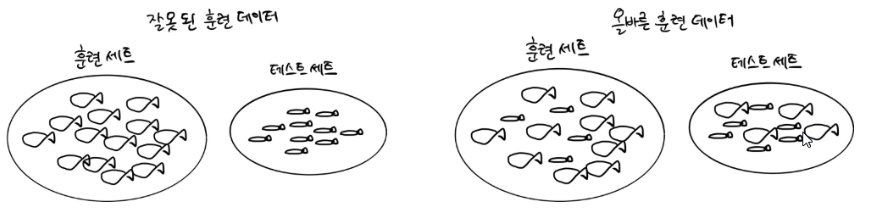

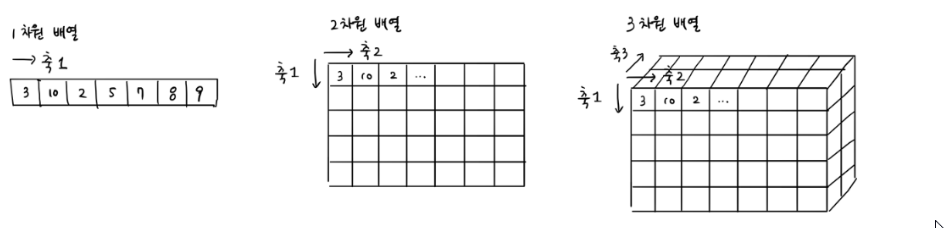

In [57]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [58]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [59]:
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [60]:
print(target_arr)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [61]:
# 훈련용 데이터는 49개의 객체와 2개의 특성(길이, 무게)을 가지고 있다.

#배열의 크기를 알려주는 메서드 .shape
print(input_arr.shape)  #(샘플수, 특성수=길이,무게)

(49, 2)


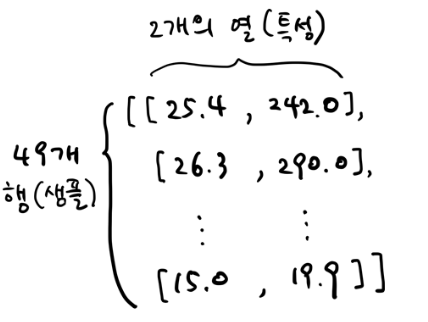

In [62]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [63]:
print(input_arr[[1,3]]) # 두번째와 네번째 샘플을 선택함

[[ 26.3 290. ]
 [ 29.  363. ]]


In [64]:
train_input = input_arr[index[:35]]   # 훈련용 샘플 0~34
train_target = target_arr[index[:35]] # 훈련용 샘플 0~34

In [65]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [66]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

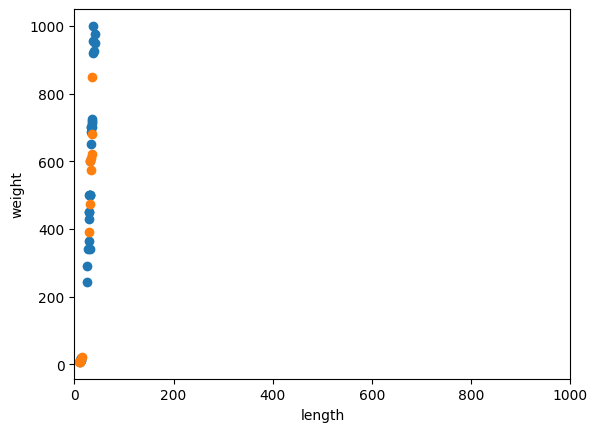

In [80]:

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0, 1000)
plt.show()

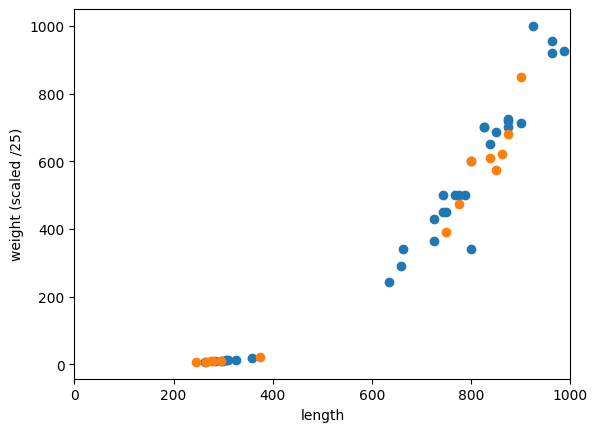

In [74]:
train_scaled = train_input.copy()
test_scaled = test_input.copy()

train_scaled[:,0] = train_input[:,0] * 25
test_scaled[:,0] = test_input[:,0] * 25

plt.scatter(train_scaled[:,0], train_input[:,1])
plt.scatter(test_scaled[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight (scaled /25)')
plt.xlim(0, 1000)  # 원하면 축 범위도 통일 가능
plt.show()

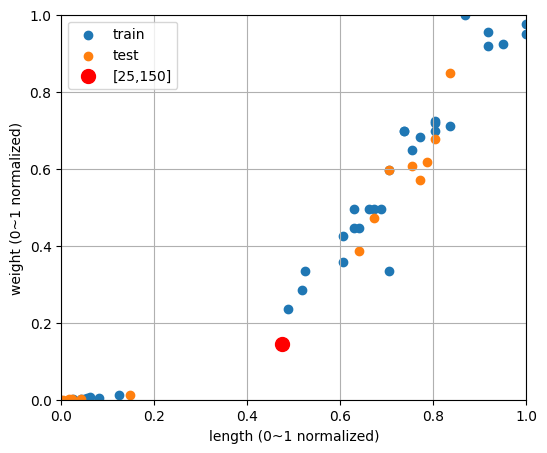

In [79]:
# 복사해서 수정
train_scaled = train_input.copy()
test_scaled = test_input.copy()

# 각 축을 0~1로 정규화
x_min, x_max = train_input[:,0].min(), train_input[:,0].max()
y_min, y_max = train_input[:,1].min(), train_input[:,1].max()

train_scaled[:,0] = (train_input[:,0] - x_min) / (x_max - x_min)
train_scaled[:,1] = (train_input[:,1] - y_min) / (y_max - y_min)

test_scaled[:,0] = (test_input[:,0] - x_min) / (x_max - x_min)
test_scaled[:,1] = (test_input[:,1] - y_min) / (y_max - y_min)

# [25,150] 점도 동일한 방식으로 변환
new_point = np.array([[25,150]])
new_scaled = np.column_stack((
    (new_point[:,0] - x_min) / (x_max - x_min),
    (new_point[:,1] - y_min) / (y_max - y_min)
))

# 그래프
plt.figure(figsize=(6,5))
plt.scatter(train_scaled[:,0], train_scaled[:,1], label='train')
plt.scatter(test_scaled[:,0], test_scaled[:,1], label='test')
plt.scatter(new_scaled[:,0], new_scaled[:,1], color='red', marker='o', s=100, label='[25,150]')
plt.xlabel('length (0~1 normalized)')
plt.ylabel('weight (0~1 normalized)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [26]:
kn.fit(train_input, train_target) # 파란색
kn.score(test_input, test_target) # 주황색

1.0

In [35]:
print(kn.predict(test_input))
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [28]:
print(test_input)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]


In [31]:
kn.predict([[25,150]])  # 길이가 25이고 무게가 150인데 도미가 아닌 빙어로 나옴

array([0])

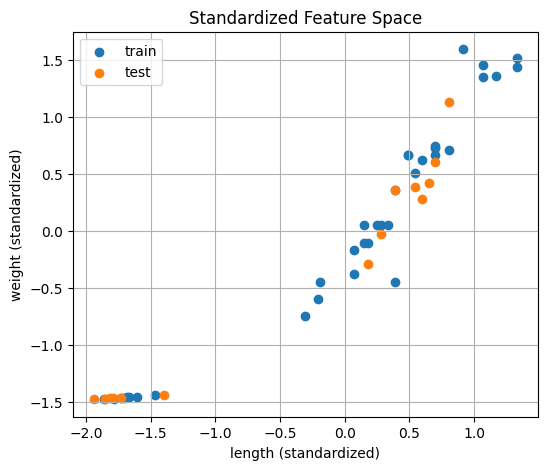

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 표준화 (StandardScaler)
scaler = StandardScaler()
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

# 그래프
plt.figure(figsize=(6, 5))
plt.scatter(train_scaled[:,0], train_scaled[:,1], label='train')
plt.scatter(test_scaled[:,0], test_scaled[:,1], label='test')
plt.xlabel('length (standardized)')
plt.ylabel('weight (standardized)')
plt.title('Standardized Feature Space')
plt.legend()
plt.grid(True)
plt.show()